In [12]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('data_finals.csv',encoding='utf-8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
gu             25 non-null object
ppl_old        25 non-null int64
metro_count    25 non-null int64
main_count     25 non-null int64
dtypes: int64(3), object(1)
memory usage: 880.0+ bytes


In [5]:
data.sort_values(by="main_count",ascending=True).head(5) #False로 하면 제일 높은게 위로 옴

,gu,ppl_old,metro_count,main_count
1,중구,19567,23,66
0,종로구,24104,15,87
17,금천구,35489,4,112
2,용산구,33249,18,125
4,광진구,44147,11,146


In [6]:
data['1main_old']=(data['ppl_old']/data['main_count']) #시설대비 노인 인구(한 시설이 균등하게 노인이 배분될 경우 한 시설에서 맡는 인구수)

In [9]:
data.sort_values(by="1main_old",ascending=False).head(5)

,gu,ppl_old,metro_count,main_count,1main_old
20,관악구,70346,4,183,384.404372
11,은평구,72731,16,221,329.099548
24,강동구,56925,11,176,323.437500
8,강북구,55416,3,173,320.323699
17,금천구,35489,4,112,316.866071


1개의 시설이 맡게되는 노인의 수가 많은 순서로 나열 한 것

In [14]:
np.corrcoef(data['ppl_old'],data['main_count']) #다른건.. 0.6안넘음 ㅋ

array([[1.        , 0.84978322],
       [0.84978322, 1.        ]])

In [20]:
import matplotlib.pyplot as plt #matplotlib중 그래프 그리는 모듈
%matplotlib inline 
import platform
from matplotlib import font_manager,rc #한글 깨짐 방지 , 맥은 코드다름 ㅋ
plt.rcParams['axes.unicode_minus']=False
path="C:\Windows\Fonts\malgun.ttf"
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

#맥 참고
import platform
from matplotlib import font_manager,rc
plt.rcParams['axes.unicode_minus']=False
rc('font',family='AppleGothic')

In [22]:
data.set_index('gu',inplace=True) # index변경

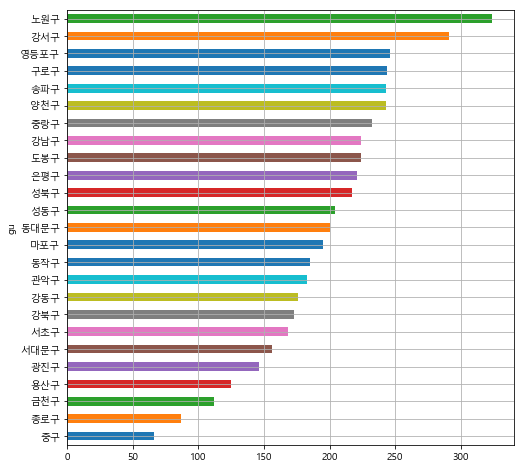

In [27]:
data['main_count'].sort_values().plot(kind='barh',grid=True, figsize=(8,8))

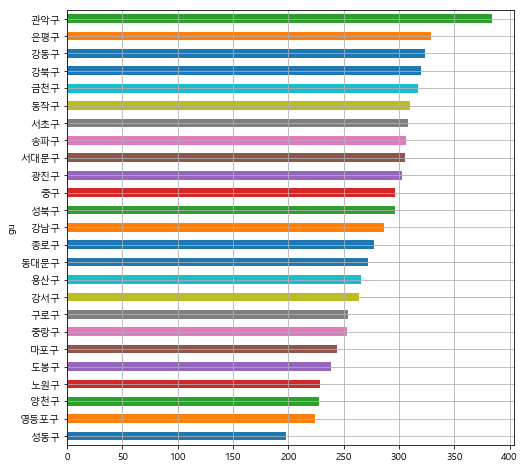

In [29]:
data['1main_old'].sort_values().plot(kind='barh',grid=True, figsize=(8,8))

In [34]:
fp1=np.polyfit(data['main_count'],data['ppl_old'],1) #[기울기,절편], 1차회귀계수생성
fp1

array([  215.24474735, 11902.29636695])

In [40]:
f1=np.poly1d(fp1)
fx=np.linspace(5,300,5)

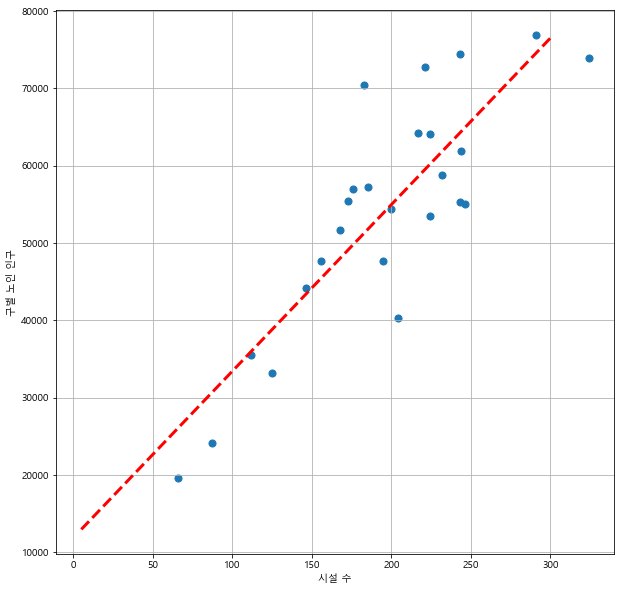

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(data['main_count'],data['ppl_old'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r')
plt.xlabel('시설 수')
plt.ylabel('구별 노인 인구')
plt.grid()
plt.show()

In [44]:
data['error']=np.abs(data['ppl_old']-f1(data['main_count']))
df_sort=data.sort_values(by='error',ascending=False)
df_sort.head()

,ppl_old,metro_count,main_count,1main_old,error
gu,,,,,
관악구,70346,4,183,384.404372,19053.914867
성동구,40351,19,204,197.799020,15461.224827
은평구,72731,16,221,329.099548,13259.614468
송파구,74388,22,243,306.123457,10181.230026
영등포구,55008,20,246,223.609756,9844.504216


In [ ]:
df_sort.to_csv('data_finals_hs.csv',sep=',',encoding='utf-8')#위에 표 저장할 때 쓰는 명령어

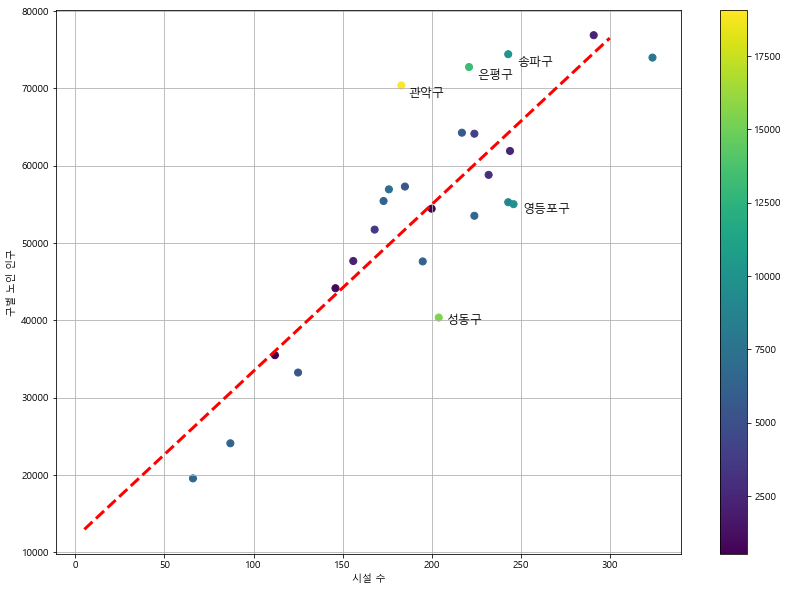

In [46]:
plt.figure(figsize=(14,10))
plt.scatter(data['main_count'],data['ppl_old'],c=data['error'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r')
for n in range(5): #제일 오차 큰 지역
    plt.text(df_sort['main_count'][n]*1.02,df_sort['ppl_old'][n]*0.98,df_sort.index[n],fontsize=12)
plt.xlabel('시설 수')
plt.ylabel('구별 노인 인구')
plt.colorbar()
plt.grid()
plt.show()
#그림 저장하고 싶으면 plt.savefig('title.jpg')